In [2]:
import os
import glob
import pathlib
import numpy as np
import pandas as pd
from numba import jit
import joblib
from joblib import Parallel, delayed
from rich.progress import track

from typing import Dict, List

import sys
sys.path.append("../src")

import config

from utils.common import timer
from utils.common import load_pickle, dump_pickle, save_cache
from utils.feature import FeatureStore

## Extract data each data_type from txt file

In addition to processing training data, fix timestamp of test data. 

In [2]:
src_dir = pathlib.Path("../data/raw/test/")
filepaths = [path_filepath for path_filepath in src_dir.glob('*')]

In [3]:
filepath = filepaths[0]

site_id = filepath.parent.parent.name
floor = "F1"
path_id = filepath.name.split(".")[0]

feature = FeatureStore(
    site_id=site_id,
    floor=floor,
    path_id=path_id,
    input_path="../data/raw/",
    save_path="./tmp/test/path_data/",
    is_test=True,
)
feature.load_all_data()
feature.save()

In [4]:
# attributes of feature store
for d_type in feature.df_types:
    print(d_type)
    display(feature[d_type].head())

accelerometer


,timestamp,x,y,z,accuracy
0,150,-0.328674,2.215241,9.983826,2
1,170,-0.211960,2.230209,10.118500,2
2,191,-0.132355,2.318192,9.983826,2
3,211,-0.023422,2.360702,9.422974,2
4,231,0.063980,2.465439,8.776550,2


accelerometer_uncalibrated


,timestamp,x,y,z,x2,y2,z2,accuracy
0,150,-0.326279,2.221832,9.805450,0.0,0.0,0.0,3
1,170,-0.326279,2.209854,10.085571,0.0,0.0,0.0,3
2,191,-0.125168,2.279892,10.105331,0.0,0.0,0.0,3
3,211,-0.119781,2.328964,9.750381,0.0,0.0,0.0,3
4,231,0.074142,2.418152,9.036911,0.0,0.0,0.0,3


beacon


,timestamp,uuid,major_id,minor_id,tx_power,rssi,distance,mac_addr,timestamp2
0,116,443c22077e83e05f54c8e47eff1370c7a4f60fca,a2d8e24fefb39ba83b50355b103ba93a5f9aab2d,cc8095e6ab820cf6938ace8f1546cef9f11c0c6e,-59,-79,8.651812,48ac783fb52673e32332a99dadc74c6577489279,1571969330862
1,150,89cb11b04122cef23388b0da06bd426c1f48a9b5,2c5fe24cd1538e636305ba06844ddb63bcc7e09a,d13e1c35a31072a6c3edefe7a27b2dbffcefa17a,-59,-85,15.128523,cc6cdc3d5e7c3bb7dbbcf581b6801faeea1bdfb8,1571969330896
2,155,89cb11b04122cef23388b0da06bd426c1f48a9b5,2c5fe24cd1538e636305ba06844ddb63bcc7e09a,c7e496a2c748bf68a27973e92a5d626518b671b4,-59,-86,16.545591,9964ed5462b5bcc24aa18dd880fa9f3883339fd9,1571969330901
3,190,f1887a4389f096edd060c1361d682ab2e2a00d2e,804b1d6b9bdf4a092376935617f5c62fb85dacd7,c5ec1c94430f36528ba60a00791c4bd0d291bb25,-87,-86,0.890824,f3dacd900937c865685f1dc55199a6059a57a622,1571969330936
4,217,89cb11b04122cef23388b0da06bd426c1f48a9b5,2c5fe24cd1538e636305ba06844ddb63bcc7e09a,e266fe167b46a5e914bac996e5372210ba085992,-59,-82,11.494898,516b988aee8ad1e6a8286514463050c0d4d77654,1571969330963


gyroscope


,timestamp,x,y,z,accuracy
0,150,-0.152664,0.022293,-0.182175,3
1,170,-0.074371,-0.002213,-0.145416,3
2,191,0.042282,-0.073044,-0.122513,3
3,211,0.123245,-0.148163,-0.097488,3
4,231,0.064651,-0.229111,-0.111328,3


gyroscope_uncalibrated


,timestamp,x,y,z,x2,y2,z2,accuracy
0,150,-0.154785,0.020157,-0.180222,-0.002121,-0.002136,0.001953,3
1,170,-0.076492,-0.004349,-0.143463,-0.002121,-0.002136,0.001953,3
2,191,0.040161,-0.075180,-0.120560,-0.002121,-0.002136,0.001953,3
3,211,0.121124,-0.150299,-0.095535,-0.002121,-0.002136,0.001953,3
4,231,0.062531,-0.231247,-0.109375,-0.002121,-0.002136,0.001953,3


magnetic_field


,timestamp,x,y,z,accuracy
0,150,-27.384949,-27.201843,-31.488037,3
1,170,-28.790283,-27.201843,-32.171630,3
2,191,-27.384949,-27.201843,-30.119324,3
3,211,-28.086853,-27.909851,-31.488037,3
4,231,-27.384949,-27.909851,-32.856750,3


magnetic_field_uncalibrated


,timestamp,x,y,z,x2,y2,z2,accuracy
0,150,-61.172485,-70.072940,-349.71620,-33.787537,-42.871094,-318.22815,3
1,170,-62.577820,-70.072940,-350.39978,-33.787537,-42.871094,-318.22815,3
2,191,-61.172485,-70.072940,-348.34747,-33.787537,-42.871094,-318.22815,3
3,211,-61.874390,-70.780945,-349.71620,-33.787537,-42.871094,-318.22815,3
4,231,-61.172485,-70.780945,-351.08490,-33.787537,-42.871094,-318.22815,3


rotation_vector


,timestamp,x,y,z,accuracy
0,150,0.065334,-0.098695,-0.875743,3
1,170,0.063852,-0.096501,-0.877451,3
2,191,0.062650,-0.097268,-0.878421,3
3,211,0.061467,-0.100240,-0.878698,3
4,231,0.060033,-0.104179,-0.878457,3


waypoint


,timestamp,x,y


wifi


,timestamp,ssid,bssid,rssi,frequency,last_seen_timestamp
0,2093,acbb2a25c3a6590ece3d96238f93c4a3aa5b9620,ac89a042c91c3cc0dffa49880c519e88a61a4c31,-49,5745,1571969331890
1,2093,8c65b0ba3733ab13b4b6cffe572477f8e82bd7fb,c406e24f40883638fd2ec55345aff97c5d9b80e3,-51,2412,1571969315536
2,2093,2ee1e542a64d0826227935267bec3742984781b1,5c33fee4437ce10e706c10350c68765c8574c758,-52,2427,1571969315709
3,2093,70853d1af60bcc3df4d22bbeb002dc1f4886a07c,4235db3dd16712ec4472dc6f31efcdc0d8719680,-53,2432,1571969331090
4,2093,b1fa38134b718e933b2d60114b7523ec36e84680,4e0b151473869f27aee515d600a4516fdf27b720,-53,2412,1571969330837


In [5]:
def extract_raw_data():
    src_dir = pathlib.Path("../data/raw/test/")
    filepaths = [path_filepath for path_filepath in src_dir.glob("*")]
    print(str(src_dir))

    for filepath in track(filepaths):
        site_id = filepath.parent.parent.name
        floor = "F1"
        path_id = filepath.name.split(".")[0]

        feature = FeatureStore(
            site_id=site_id,
            floor=floor,
            path_id=path_id,
            input_path="../data/raw/",
            save_path="../data/submit/path_data/",
            is_test=True,
        )
        feature.load_all_data()
        feature.save()

In [6]:
update = False

if update:
    extract_raw_data()

---

## Fix timestamp of test data

<AxesSubplot:>

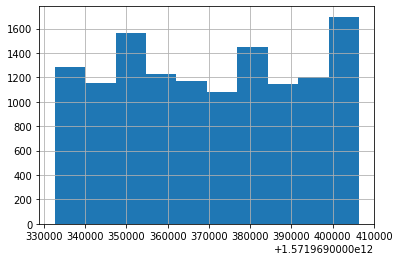

In [7]:
# Ref: https://www.kaggle.com/jiweiliu/fix-the-timestamps-of-test-data-using-dask

def estimate_timestamp_gap(wifi: pd.DataFrame) -> int:
    wifi_groups = wifi.groupby('timestamp')
    ts_gap = (wifi_groups['last_seen_timestamp'].max().sort_index().astype(int) - wifi_groups['timestamp'].max().sort_index().astype(int)).max()
    return ts_gap

ts_gap = estimate_timestamp_gap(feature.wifi)

pd.Series(feature.wifi['timestamp'].astype(int) + ts_gap).hist()

---

## Feature Engineering

### Waypoint

In [8]:
@save_cache("../data/submit/test_waypoint.pkl", True)
def create_test_waypoint():
    waypoint = pd.read_csv("../data/raw/sample_submission.csv")
    waypoint[["site", "path", "timestamp"]] = waypoint["site_path_timestamp"].str.split(
        "_", expand=True
    )
    waypoint.drop(["site_path_timestamp"], axis=1, inplace=True)

    waypoint = waypoint[["timestamp", "x", "y", "site", "floor", "path"]]
    return waypoint

In [9]:
waypoint = create_test_waypoint()

Load pickle from ../data/submit/test_waypoint.pkl


In [10]:
waypoint.head()

,timestamp,x,y,site,floor,path
0,0000000000009,75.0,75.0,5a0546857ecc773753327266,0,046cfa46be49fc10834815c6
1,0000000009017,75.0,75.0,5a0546857ecc773753327266,0,046cfa46be49fc10834815c6
2,0000000015326,75.0,75.0,5a0546857ecc773753327266,0,046cfa46be49fc10834815c6
3,0000000018763,75.0,75.0,5a0546857ecc773753327266,0,046cfa46be49fc10834815c6
4,0000000022328,75.0,75.0,5a0546857ecc773753327266,0,046cfa46be49fc10834815c6


### Build

In [11]:
@save_cache("../data/submit/test_site_id.pkl", True)
def create_test_build():
    def get_waypoint_from_featureStore(path_id):
        feature = load_pickle(f"../data/submit/path_data/{path_id}.pkl", verbose=False)
        return site_map[feature.site_id]

    waypoint = load_pickle("../data/submit/test_waypoint.pkl", verbose=False)
    site_map = load_pickle("../data/label_encode/map_site_id.pkl", verbose=False)
    build = waypoint["site"].map(site_map).to_numpy()

    np.save("../data/submit/test_site_id.npy", build)
    return build

In [12]:
build = create_test_build()

Load pickle from ../data/submit/test_site_id.pkl


In [13]:
build

array([  1,   1,   1, ..., 204, 204, 204])

### Wifi

In [19]:
@save_cache("../data/submit/test_wifi_results.pkl", True)
def create_test_wifi():
    def estimate_timestamp_gap(wifi: pd.DataFrame) -> int:
        wifi_groups = wifi.groupby('timestamp')
        ts_gap = (wifi_groups['last_seen_timestamp'].max().sort_index().astype(int) - wifi_groups['timestamp'].max().sort_index().astype(int)).max()
        return ts_gap

    def get_wifi_feature(path_id, gdf):
        seq_len = 100
        bssid = []
        rssi = []
        freq = []

        feature = load_pickle(f"../data/submit/path_data/{path_id}.pkl", verbose=False)
        wifi = feature.wifi.copy()
        wifi["bssid"] = wifi["bssid"].map(bssid_map)

        

        min_idx = gdf.index.min()
        max_idx = gdf.index.max()

        for i, row in gdf.iterrows():
            ts_pre_wp = int(gdf.loc[i - 1, "timestamp"]) if i > min_idx else None
            ts_current_wp = int(gdf.loc[i, "timestamp"])
            ts_post_wp = int(gdf.loc[i + 1, "timestamp"]) if (i + 1) < max_idx else None

            _wifi = wifi.copy()
            ts_gap = estimate_timestamp_gap(_wifi.copy())
            _wifi["timestamp"] = (_wifi["timestamp"].astype(int) + ts_gap)
            # NOTE: ターゲットとなるwaypointとその前後のwaypointの間にあるデータを取得する。
            ts_wifi = _wifi["timestamp"].values
            pre_flag = (
                np.ones(len(ts_wifi)).astype(bool)
                if ts_pre_wp is None
                else (ts_pre_wp < ts_wifi)
            )
            psot_flag = (
                np.ones(len(ts_wifi)).astype(bool)
                if ts_post_wp is None
                else (ts_wifi < ts_post_wp)
            )
            _wifi = _wifi[pre_flag & psot_flag]

            _wifi = _wifi.sort_values(by="rssi", ascending=False)
            _wifi = _wifi.head(seq_len)

            _bssid = np.zeros(seq_len)
            _rssi = np.tile(-999, seq_len)
            _freq = np.tile(-999, seq_len)

            _bssid[: len(_wifi)] = _wifi["bssid"].fillna(0).to_numpy()
            _rssi[: len(_wifi)] = _wifi["rssi"].fillna(-999).to_numpy()
            _freq[: len(_wifi)] = _wifi["frequency"].fillna(-999).to_numpy()

            bssid.append(_bssid.astype("int32"))
            rssi.append(_rssi.astype("float32"))
            freq.append(_freq.astype("float32"))

        return bssid, rssi, freq

    waypoint = load_pickle("../data/submit/test_waypoint.pkl", verbose=False)
    bssid_map = load_pickle("../data/label_encode/map_bssid.pkl", verbose=False)
    results = Parallel(n_jobs=-1)(
        delayed(get_wifi_feature)(path_id, gdf)
        for path_id, gdf in track(waypoint.groupby("path"))
    )
    return results

In [20]:
results = create_test_wifi()

Output()

Dump pickle to ../data/submit/test_wifi_results.pkl
